# Benchmark Results

In [36]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [28]:
bft = pd.read_excel('bft.xlsx')
bft.columns = ['Id', 'Team', 'Gender', 'flat_bench_press', 'trap_bar_deadlift']

In [29]:
female = bft[bft.Gender == 'Female']
male = bft[bft.Gender == 'Male']
bft.head()

,Id,Team,Gender,flat_bench_press,trap_bar_deadlift
0,1,H,Male,60.0,109
1,2,H,Male,100.0,194
2,3,H,Female,30.0,94
3,4,H,Female,25.0,69
4,5,H,Male,35.0,94


# Participants

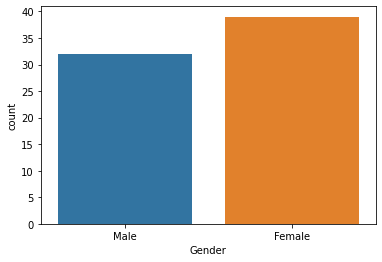

More females than male participants.


,Gender,Count
0,Female,39
1,Male,32


In [30]:
sns.countplot(x='Gender', data=bft)
plt.show()
gender_count = bft.groupby('Gender').Id.count().reset_index()
gender_count.rename(columns={'Id':'Count'}, inplace=True)
print('More females than male participants.')
gender_count

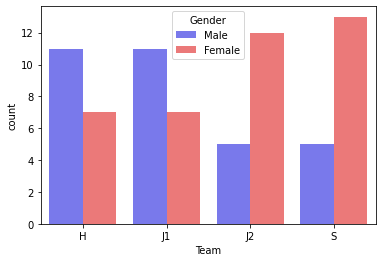

Distribution of females and males amongst teams.


Gender,Female,Male
Team,,
H,7,11
J1,7,11
J2,12,5
S,13,5


In [31]:
sns.countplot(x='Team', data=bft, hue='Gender', palette={'Male':'Blue', 'Female':'Red'}, alpha=0.6)
plt.show()
team_count = bft.groupby(['Team', 'Gender']).Id.count().reset_index()
team_count.rename(columns={'Id':'Count'}, inplace=True)
team_pivot = team_count.pivot(columns='Gender', index='Team',values='Count')
print('Distribution of females and males amongst teams.')
team_pivot

# Flat Bench Press

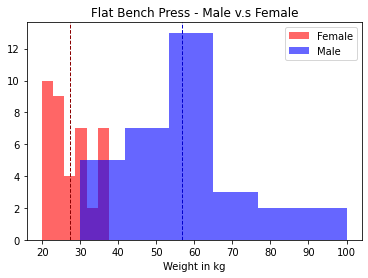

The female mean for flat bench press is 27.3 kg.
The male mean for flat bench press is 56.6 kg.


In [32]:
plt.hist(female.flat_bench_press, range=(20, 37.5), bins=6, alpha=0.6, color='red')
plt.hist(male.flat_bench_press, range=(30, 100), bins=6, alpha=0.6, color='blue')
plt.title('Flat Bench Press - Male v.s Female')
plt.xlabel('Weight in kg')
plt.legend(['Female', 'Male'])
plt.axvline(female.flat_bench_press.mean(), color='DarkRed', linestyle='dashed', linewidth=1)
plt.axvline(male.flat_bench_press.mean(), color='MediumBlue', linestyle='dashed', linewidth=1)
plt.show()

print('The female mean for flat bench press is ' + str(round(female.flat_bench_press.mean(),1)) + ' kg.')
print('The male mean for flat bench press is ' + str(round(male.flat_bench_press.mean(),1)) + ' kg.')

# Trap Bar Deadlift

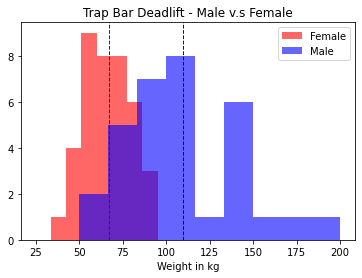

The female mean for trap bar deadlift is 66.9 kg.
The male mean for trap bar deadlift is 109.8 kg.


In [33]:
plt.hist(female.trap_bar_deadlift, range=(25, 200), bins=20, alpha=0.6, color='red')
plt.hist(male.trap_bar_deadlift, range=(50, 200), bins=9, alpha=0.6, color='blue')
plt.title('Trap Bar Deadlift - Male v.s Female')
plt.xlabel('Weight in kg')
plt.legend(['Female', 'Male'])
plt.axvline(female.trap_bar_deadlift.mean(), color='DarkRed', linestyle='dashed', linewidth=1)
plt.axvline(male.trap_bar_deadlift.mean(), color='MediumBlue', linestyle='dashed', linewidth=1)
plt.show()

print('The female mean for trap bar deadlift is ' + str(round(female.trap_bar_deadlift.mean(),1)) + ' kg.')
print('The male mean for trap bar deadlift is ' + str(round(male.trap_bar_deadlift.mean(),1)) + ' kg.')

# Team Performance

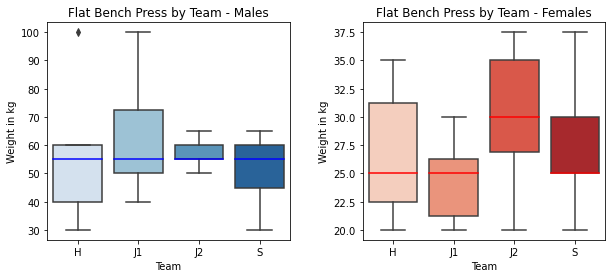

In [34]:
# Flat Bench Press 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='Team', y='flat_bench_press', data=male, palette='Blues',\
           medianprops=dict(color="Blue", alpha=1))
plt.title('Flat Bench Press by Team - Males')
plt.ylabel('Weight in kg')

plt.subplot(1,2,2)
sns.boxplot(x='Team', y='flat_bench_press', data=female, palette='Reds',\
           medianprops=dict(color="Red", alpha=1))
plt.title('Flat Bench Press by Team - Females')
plt.ylabel('Weight in kg')

plt.subplots_adjust(wspace=0.3)
plt.show()

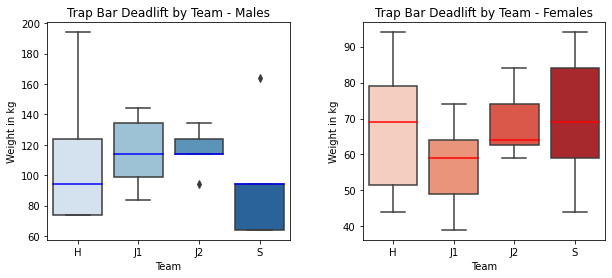

In [35]:
# Trap Bar Deadlift
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='Team', y='trap_bar_deadlift', data=male, palette='Blues',\
           medianprops=dict(color="Blue", alpha=1))
plt.title('Trap Bar Deadlift by Team - Males')
plt.ylabel('Weight in kg')

plt.subplot(1,2,2)
sns.boxplot(x='Team', y='trap_bar_deadlift', data=female, palette='Reds',\
           medianprops=dict(color="Red", alpha=1))
plt.title('Trap Bar Deadlift by Team - Females')
plt.ylabel('Weight in kg')

plt.subplots_adjust(wspace=0.3)
plt.show()

# Percentile Checker
To check your percentile, use the function percentile_checker(). The arguments in order should be:
* Benchpress weight
* Deadlift weight
* Your gender in quotation marks, e.g. 'Female' or 'Male'.

For example, if I were a female and I lift 20kg and 74kg for my bench press and deadlift respectively:

percentile_checker(20, 74, 'Female').

In [56]:
def percentile_checker(benchpress, deadlift, gender):
    if gender == 'Female':
        benchpress_percentile = round(stats.percentileofscore(female.flat_bench_press, benchpress))
        deadlift_percentile = round(stats.percentileofscore(female.trap_bar_deadlift, deadlift))
        print('You are in the ' + str(benchpress_percentile) + 'th percentile for flat bench press (female).')
        print('You are in the ' + str(deadlift_percentile) + 'th percentile for trap bar deadlift (female).')
    else:
        benchpress_percentile = round(stats.percentileofscore(male.flat_bench_press, benchpress))
        deadlift_percentile = round(stats.percentileofscore(male.trap_bar_deadlift, deadlift))
        print('You are in the ' + str(benchpress_percentile) + 'th percentile for flat bench press (male).')
        print('You are in the ' + str(deadlift_percentile) + 'th percentile for trap bar deadlift (male).')

In [52]:
percentile_checker(20, 74, 'Female')

You are in the 13th percentile for flat bench press (female).
You are in the 72th percentile for trap bar deadlift (female).
